# Crawl Data Twitter > 1500 Tweets
The crawling process was done using Tweet-Harvest. Written by Helmi Satria on October 18th.

In [ ]:
#@title Twitter Auth Token

twitter_auth_token = '88302bc4fb89ade5ab8552082b1e5b08b84aa874'

In [ ]:
# Import required Python package
!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [737 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,961 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ub

In [ ]:
# Crawl Data

filename = 'tweet-polusiudara.csv'
search_keyword = 'polusi udara jakarta until:2023-08-31 since:2023-08-01'
limit = 500

!npx --yes tweet-harvest@2.2.8 -o "{filename}" -s "{search_keyword}" -l {limit} --token {twitter_auth_token}


Welcome to the Twitter Crawler 🕷️

This script uses Chromium Browser to crawl data from Twitter with *your* Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


added 3 packages in 1s
Installing dependencies...
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 https://deb.nodesource.com/node_20.x nodistro InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:7 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 ht

## **TEXT PREPROCESSING**

In [ ]:
import numpy as np                                          #import numpy untuk mengelola komputasi matrix
import pandas as pd                                         # untuk meng import data dari sumber dari luar
import matplotlib.pyplot as plt                             #visualisasikan data ke grafik
import seaborn as sns                                       #visualisasikan data menjadi lebih menarik dan informatif
sns.set()
from warnings import filterwarnings                                 #mengimpor fungsi filterwarnings dari modul warnings,digunakan untuk mengatur perilaku peringatan dalam kode.
filterwarnings('ignore')                                            #mengatur perilaku peringatan untuk diabaikan tujuannya untuk membantu menghindari tampilnya peringatan yang tidak perlu selama eksekusi kode
from sklearn.model_selection import train_test_split                #Fungsi ini digunakan untuk membagi dataset menjadi subset pelatihan dan subset pengujian, yang berguna dalam pengembangan model prediktif

In [ ]:
df = pd.read_csv('tweet-polusiudara-labelling.csv')                 #membaca/load dataset tweet
df                                                                  #menampilkan dataset

,username,full_text,Sentimen,Label
0,irfanwahidi60,"Akhirnya terang benderang, gembar gembor polus...",Negatif,-1
1,piotrj,"🚩ITU 🚩BUKAN 🚩KABUT Selama seminggu ada WFH, s...",Negatif,-1
2,cgtrisanjaya,@geloraco Betul. Sebaiknya pemerintah segera m...,Negatif,-1
3,limitfungsii,"gila parah, jakarta krisis polusi udara, gue d...",Negatif,-1
4,Nofendra19,"Polusi udara di Jakarta, lalu yang disalahkan ...",Negatif,-1
...,...,...,...,...
505,Polusi_udara01,#Asean #Fifa #trending #southeastAsia #BakarSa...,Negatif,-1
506,5ulam_4ja,Nah jokowi mengumpulkan menteri untuk membahas...,Positif,1
507,radarbangsa_com,Polusi Udara di Jabodetabek Menparekraf Sebut ...,Negatif,-1
508,KAI_THE_BRAND,yang masih nyemprot parfum biar ga bau badan m...,Negatif,-1


***CASE FOLDING DAN CLEANING***

In [ ]:
#sumber : https://pypi.org/project/emoji/             #Modul "emoji" adalah pustaka yang menyediakan berbagai fitur dan fungsi terkait dengan penggunaan emoji dalam pemrograman Python

!pip install emoji                                            #menginstal modul emoji

In [ ]:
from nltk.tokenize import word_tokenize # mengimport fungsi word_tokenize dari modul nltk.tokenize (membagi teks menjadi token)
from nltk.corpus import stopwords   #mengimport modul stopword (untuk menghilangkan stopwords dari teks)

import re, emoji              #Mengimpor modul re untuk mengakses ekspresi reguler (regular expressions) dan modul emoji untuk memproses emoji dalam teks.

from string import punctuation #Mengimpor variabel punctuation dari modul string (untuk membersihkan teks dari tanda baca)

In [ ]:
# Mengubah huruf besar menjadi huruf kecil
def casefolding(text):
  text = text.lower()
  return text

df['CaseFolding'] = df['full_text'].apply(casefolding)
df['CaseFolding']

0      akhirnya terang benderang, gembar gembor polus...
1      🚩itu 🚩bukan 🚩kabut  selama seminggu ada wfh, s...
2      @geloraco betul. sebaiknya pemerintah segera m...
3      gila parah, jakarta krisis polusi udara, gue d...
4      polusi udara di jakarta, lalu yang disalahkan ...
                             ...                        
505    #asean #fifa #trending #southeastasia #bakarsa...
506    nah jokowi mengumpulkan menteri untuk membahas...
507    polusi udara di jabodetabek menparekraf sebut ...
508    yang masih nyemprot parfum biar ga bau badan m...
509    upaya pemerintah mengatasi polusi udara di dki...
Name: CaseFolding, Length: 510, dtype: object

In [ ]:
def cleansing(text):                                 #serangkaian langkah pembersihan atau preprocessing pada teks
  text = re.sub(r'@[A-Za-z0-0_]+', '', text)                    # menghapus mention
  text = re.sub(r'#\w+', '', text)                                # menghapus hastag
  text = re.sub(r'RT[\s]+', '', text)                              #menghaous Retweet
  text = re.sub(r'(https|https):\/\/\S+', '', text)           #menghapus http /https
  text = re.sub(r'[^A-Za-z0-9 ]', ' ', text)                      # menghapus karakter
  text = re.sub(r'\s+', ' ', text).strip()                          #menghapus spasi di awal dan di akhit
  text = re.sub(r'(.)\1+', r'\1\1', text)
  text = re.sub(r'[\?\.\!]+(?=[\?.\!])', '', text)
  text = re.sub(r'\b[a-zA-Z]\b', '', text)
  text = re.sub(r'\d+', '', text)
  return text                                                       # Mengembalikan teks yang telah diproses dan dibersihkan

def remove_emojis(data):
    emoj = re.compile("["
        u"\U00002700-\U000027BF"  # Dingbats
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U00002600-\U000026FF"  # Miscellaneous Symbols
        u"\U0001F300-\U0001F5FF"  # Miscellaneous Symbols And Pictographs
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U0001F680-\U0001F6FF"  # Transport and Map Symbols
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

df['Cleansing'] = df['CaseFolding'].apply(cleansing, remove_emojis)

df['Cleansing']


0      akhirnya terang benderang gembar gembor polusi...
1      itu bukan kabut selama seminggu ada wfh sempro...
2      betul sebaiknya pemerintah segera memberikan k...
3      gila parah jakarta krisis polusi udara gue dri...
4      polusi udara di jakarta lalu yang disalahkan u...
                             ...                        
505       selasa udara klp gading kembali tercemar ol...
506    nah jokowi mengumpulkan menteri untuk membahas...
507    polusi udara di jabodetabek menparekraf sebut ...
508    yang masih nyemprot parfum biar ga bau badan m...
509    upaya pemerintah mengatasi polusi udara di dki...
Name: Cleansing, Length: 510, dtype: object

***REMOVE DUPLICATE***

In [ ]:
duplicates = df[df.duplicated(subset=['full_text'])]

# Menampilkan baris duplikat
print("\nBaris duplikat:\n", duplicates)
df = df.drop_duplicates(subset=['full_text'])
df = df.reset_index(drop =True)
df['full_text']


Baris duplikat:
             username                                          full_text  \
49        adinback20  Untuk Atasi Polusi Udara di Jakarta, Pemerinta...   
86      posaktualcom  Untuk Atasi Polusi Udara di Jakarta, Pemerinta...   
90       polhukamid_  Untuk Atasi Polusi Udara di Jakarta, Pemerinta...   
92     OposisiCerdas  Untuk Atasi Polusi Udara di Jakarta, Pemerinta...   
96          geloraco  Untuk Atasi Polusi Udara di Jakarta, Pemerinta...   
116        Toto_1945  BPJS Habiskan Rp10 T untuk Penyakit Napas, Men...   
117         manda34b  BPJS Habiskan Rp10 T untuk Penyakit Napas, Men...   
119       tempodotco  Sudah WFH Tapi Polusi Udara Jakarta Masih Ting...   
131         Metro_TV  Guru Besar Ilmu Lingkungan Hidup Universitas D...   
148          sukarja  Mengatasi Polusi Udara di Jakarta, Peran PLTU ...   
153        100kpjcom  Menanti Pertamax Dikasih Subsidi Demi Kurangi ...   
271      PKSejahtera  Kurniasih: BPJS Kesehatan Wajib Lindungi dan T...   
274    

0      Akhirnya terang benderang, gembar gembor polus...
1      🚩ITU 🚩BUKAN 🚩KABUT  Selama seminggu ada WFH, s...
2      @geloraco Betul. Sebaiknya pemerintah segera m...
3      gila parah, jakarta krisis polusi udara, gue d...
4      Polusi udara di Jakarta, lalu yang disalahkan ...
                             ...                        
487    #Asean #Fifa #trending #southeastAsia #BakarSa...
488    Nah jokowi mengumpulkan menteri untuk membahas...
489    Polusi Udara di Jabodetabek Menparekraf Sebut ...
490    yang masih nyemprot parfum biar ga bau badan m...
491    Upaya pemerintah mengatasi polusi udara di DKI...
Name: full_text, Length: 492, dtype: object

***TOKENIZATION***

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def word_tokenize_wrapper(text):
  return word_tokenize(text)
def word_tokenize_wrapper(text):
  return word_tokenize(text)

df['Tokenize'] = df['Cleansing'].apply(word_tokenize_wrapper)
df['Tokenize']

0      [akhirnya, terang, benderang, gembar, gembor, ...
1      [itu, bukan, kabut, selama, seminggu, ada, wfh...
2      [betul, sebaiknya, pemerintah, segera, memberi...
3      [gila, parah, jakarta, krisis, polusi, udara, ...
4      [polusi, udara, di, jakarta, lalu, yang, disal...
                             ...                        
487    [selasa, udara, klp, gading, kembali, tercemar...
488    [nah, jokowi, mengumpulkan, menteri, untuk, me...
489    [polusi, udara, di, jabodetabek, menparekraf, ...
490    [yang, masih, nyemprot, parfum, biar, ga, bau,...
491    [upaya, pemerintah, mengatasi, polusi, udara, ...
Name: Tokenize, Length: 492, dtype: object

In [ ]:
df.loc[10:15, ['Tokenize']]

,Tokenize
10,"[warga, jakarta, harus, beralih, dari, mobil, ..."
11,"[polusi, udara, pagi, hari, ini, pasti, buruk,..."
12,"[am, jakarta, rank, dunia, ada, lokasi, yg, po..."
13,"[gunungan, batu, bara, di, jakarta, utara, pen..."
14,"[seperti, apakah, kisah, polusi, udara, apakah..."
15,"[polusi, udara, yg, terjadi, di, jakarta, dise..."


***NORMALIZATION***

In [ ]:
import pandas as pd
import csv
import string

In [ ]:
normalized_word = pd.read_csv('colloquial-indonesian-lexicon.csv')

normalized_word_dict= {}
for index, row in normalized_word.iterrows():
  if row[0] not in normalized_word_dict:
    normalized_word_dict[row[0]]=row[1]

def normalized_term(document):
  return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

df['Normalisasi'] = df['Tokenize'].apply(normalized_term)
df['Normalisasi']

0      [akhirnya, terang, benderang, gembar, gembor, ...
1      [itu, bukan, kabut, selama, seminggu, ada, wfh...
2      [betul, sebaiknya, pemerintah, segera, memberi...
3      [gila, parah, jakarta, krisis, polusi, udara, ...
4      [polusi, udara, di, jakarta, lalu, yang, disal...
                             ...                        
487    [selasa, udara, klp, gading, kembali, tercemar...
488    [nah, jokowi, mengumpulkan, menteri, untuk, me...
489    [polusi, udara, di, jabodetabek, menparekraf, ...
490    [yang, masih, nyemprot, parfum, biar, enggak, ...
491    [upaya, pemerintah, mengatasi, polusi, udara, ...
Name: Normalisasi, Length: 492, dtype: object

In [ ]:
normalized_word1 = pd.read_csv('kbba.txt', sep='\t')

normalized_word_dict1= {}
for index, row in normalized_word1.iterrows():
  if row[0] not in normalized_word_dict1:
    normalized_word_dict1[row[0]]=row[1]

def normalized_term1(document):
  return [normalized_word_dict1[term] if term in normalized_word_dict1 else term for term in document]

df['Normalisasi'] = df['Normalisasi'].apply(normalized_term1)
df['Normalisasi']

0      [akhirnya, terang, benderang, gembar, gembor, ...
1      [itu, bukan, kabut, selama, seminggu, ada, wfh...
2      [betul, sebaiknya, pemerintah, segera, memberi...
3      [gila, parah, jakarta, krisis, polusi, udara, ...
4      [polusi, udara, di, jakarta, lalu, yang, disal...
                             ...                        
487    [selasa, udara, klp, gading, kembali, tercemar...
488    [nah, jokowi, mengumpulkan, menteri, untuk, me...
489    [polusi, udara, di, jabodetabek, kementrian pa...
490    [yang, masih, semprot, parfum, biar, tidak, ba...
491    [upaya, pemerintah, mengatasi, polusi, udara, ...
Name: Normalisasi, Length: 492, dtype: object

In [ ]:
normalized_word2 = pd.read_csv('slangword.txt', sep=':')

normalized_word_dict2= {}
for index, row in normalized_word2.iterrows():
  if row[0] not in normalized_word_dict2:
    normalized_word_dict2[row[0]]=row[1]

def normalized_term2(document):
  return [normalized_word_dict2[term] if term in normalized_word_dict2 else term for term in document]

df['Normalisasi'] = df['Normalisasi'].apply(normalized_term2)
df['Normalisasi']

0      [akhirnya, terang, benderang, gembar, gembor, ...
1      [itu, bukan, kabut, selama, seminggu, ada, ker...
2      [betul, sebaiknya, pemerintah, segera, memberi...
3      [gila, parah, jakarta, krisis, polusi, udara, ...
4      [polusi, udara, di, jakarta, lalu, yang, disal...
                             ...                        
487    [selasa, udara, kelapa, gading, kembali, terce...
488    [nah, jokowi, mengumpulkan, menteri, untuk, me...
489    [polusi, udara, di, jabodetabek, kementrian pa...
490    [yang, masih, semprot, parfum, biar, tidak, ba...
491    [upaya, pemerintah, mengatasi, polusi, udara, ...
Name: Normalisasi, Length: 492, dtype: object

In [ ]:
df.loc[10:15, ['Normalisasi']]

,Normalisasi
10,"[warga, jakarta, harus, beralih, dari, mobil, ..."
11,"[polusi, udara, pagi, hari, ini, pasti, buruk,..."
12,"[sama, jakarta, rank, dunia, ada, lokasi, yang..."
13,"[gunungan, batu, bara, di, jakarta, utara, pen..."
14,"[seperti, apakah, kisah, polusi, udara, apakah..."
15,"[polusi, udara, yang, terjadi, di, jakarta, di..."


***STOPWORD REMOVAL***

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stopw = set(stopwords.words('indonesian'))

def sw_removal (words):
  return [word for word in words if word not in stopw]
# Menghapus stopwords dari setiap teks dalam DataFrame
df['Stopword_Removal'] = df['Normalisasi'].apply(sw_removal)
df['Stopword_Removal']

0      [terang, benderang, gembar, gembor, polusi, ud...
1      [kabut, seminggu, kerja dari rumah, semprot, a...
2      [pemerintah, ktp, sih, udara, polusi, memerint...
3      [gila, parah, jakarta, krisis, polusi, udara, ...
4      [polusi, udara, jakarta, disalahkan, ukm, indu...
                             ...                        
487    [selasa, udara, kelapa, gading, tercemar, sese...
488    [jokowi, mengumpulkan, menteri, membahas, polu...
489    [polusi, udara, jabodetabek, kementrian pariwi...
490    [semprot, parfum, biar, bau, badan, menambah, ...
491    [upaya, pemerintah, mengatasi, polusi, udara, ...
Name: Stopword_Removal, Length: 492, dtype: object

In [ ]:
df.loc[10:15, ['Stopword_Removal']]

,Stopword_Removal
10,"[warga, jakarta, beralih, mobil, pribadi, moda..."
11,"[polusi, udara, pagi, buruk, jam, anak, masuk,..."
12,"[jakarta, rank, dunia, lokasi, polusi, udara, ..."
13,"[gunungan, batu, bara, jakarta, utara, penyumb..."
14,"[kisah, polusi, udara, buruknya, lihat, esok, ..."
15,"[polusi, udara, jakarta, disengaja, maksud, an..."


***STEMMING***

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.2 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
# Membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
def stemming(text):
  return [stemmer.stem(token) for token in text]

df['Stemming'] = df['Stopword_Removal'].apply(stemming)
df['Stemming']

0      [terang, benderang, gembar, gembor, polusi, ud...
1      [kabut, minggu, kerja dari rumah, semprot, air...
2      [perintah, ktp, sih, udara, polusi, perintah, ...
3      [gila, parah, jakarta, krisis, polusi, udara, ...
4      [polusi, udara, jakarta, salah, ukm, industri,...
                             ...                        
487    [selasa, udara, kelapa, gading, cemar, segera ...
488    [jokowi, kumpul, menteri, bahas, polusi, udara...
489    [polusi, udara, jabodetabek, tri pariwisata da...
490    [semprot, parfum, biar, bau, badan, tambah, po...
491    [upaya, perintah, atas, polusi, udara, dki, ja...
Name: Stemming, Length: 492, dtype: object

In [ ]:
df.loc[10:15, ['Stemming']]

,Stemming
10,"[warga, jakarta, alih, mobil, pribadi, moda, t..."
11,"[polusi, udara, pagi, buruk, jam, anak, masuk,..."
12,"[jakarta, rank, dunia, lokasi, polusi, udara, ..."
13,"[gunung, batu, bara, jakarta, utara, sumbang, ..."
14,"[kisah, polusi, udara, buruk, lihat, esok, kis..."
15,"[polusi, udara, jakarta, sengaja, maksud, anak..."


In [ ]:
# Mengubah data dari bentuk token menjadi bentuk text list

import ast
def join_text_list(texts):
  return ' '.join([text for text in texts])

df['Tweet_bersih'] = df['Stemming'].apply(join_text_list)
df['Tweet_bersih']

0      terang benderang gembar gembor polusi udara ja...
1      kabut minggu kerja dari rumah semprot air huja...
2      perintah ktp sih udara polusi perintah udara p...
3      gila parah jakarta krisis polusi udara flyover...
4      polusi udara jakarta salah ukm industri sebab ...
                             ...                        
487    selasa udara kelapa gading cemar segera mungki...
488    jokowi kumpul menteri bahas polusi udara jakar...
489    polusi udara jabodetabek tri pariwisata dan ek...
490    semprot parfum biar bau badan tambah polusi ud...
491    upaya perintah atas polusi udara dki jakarta g...
Name: Tweet_bersih, Length: 492, dtype: object

In [ ]:
# Menghitung akurasi Stemming

# Token asli
token_asli = df['Stopword_Removal']
# Token setelah stemming
stemmed_tokens = df['Stemming']

# Inisialisasi list untuk menyimpan token yang sama
same_tokens_list = []
# Menyimpan token yang sama
for original, stemmed in zip(token_asli, stemmed_tokens):
    same_tokens = [token for token in original if token in stemmed]
    same_tokens_list.append(same_tokens)

# Menghitung jumlah token yang sama antara token asli dan token setelah stemming
total_token_sama = sum(sum(1 for original, stemmed in zip(original, stemmed)
if original == stemmed) for original, stemmed in zip(token_asli, stemmed_tokens))
# Menghitung total token
total_tokens = sum(len(tokens) for tokens in token_asli)

# Menghitung akurasi stemming
accuracy = total_token_sama / total_tokens * 100

print("Jumlah token yang sama:", total_token_sama)
print("Jumlah total token:", total_tokens)
print("Akurasi stemming:", accuracy, "%")


Jumlah token yang sama: 5434
Jumlah total token: 7205
Akurasi stemming: 75.41984732824427 %


In [ ]:
df

,username,full_text,Sentimen,Label,CaseFolding,Cleansing,Tokenize,Normalisasi,Stopword_Removal,Stemming,Tweet_bersih
0,irfanwahidi60,"Akhirnya terang benderang, gembar gembor polus...",Negatif,-1,"akhirnya terang benderang, gembar gembor polus...",akhirnya terang benderang gembar gembor polusi...,"[akhirnya, terang, benderang, gembar, gembor, ...","[akhirnya, terang, benderang, gembar, gembor, ...","[terang, benderang, gembar, gembor, polusi, ud...","[terang, benderang, gembar, gembor, polusi, ud...",terang benderang gembar gembor polusi udara ja...
1,piotrj,"🚩ITU 🚩BUKAN 🚩KABUT Selama seminggu ada WFH, s...",Negatif,-1,"🚩itu 🚩bukan 🚩kabut selama seminggu ada wfh, s...",itu bukan kabut selama seminggu ada wfh sempro...,"[itu, bukan, kabut, selama, seminggu, ada, wfh...","[itu, bukan, kabut, selama, seminggu, ada, ker...","[kabut, seminggu, kerja dari rumah, semprot, a...","[kabut, minggu, kerja dari rumah, semprot, air...",kabut minggu kerja dari rumah semprot air huja...
2,cgtrisanjaya,@geloraco Betul. Sebaiknya pemerintah segera m...,Negatif,-1,@geloraco betul. sebaiknya pemerintah segera m...,betul sebaiknya pemerintah segera memberikan k...,"[betul, sebaiknya, pemerintah, segera, memberi...","[betul, sebaiknya, pemerintah, segera, memberi...","[pemerintah, ktp, sih, udara, polusi, memerint...","[perintah, ktp, sih, udara, polusi, perintah, ...",perintah ktp sih udara polusi perintah udara p...
3,limitfungsii,"gila parah, jakarta krisis polusi udara, gue d...",Negatif,-1,"gila parah, jakarta krisis polusi udara, gue d...",gila parah jakarta krisis polusi udara gue dri...,"[gila, parah, jakarta, krisis, polusi, udara, ...","[gila, parah, jakarta, krisis, polusi, udara, ...","[gila, parah, jakarta, krisis, polusi, udara, ...","[gila, parah, jakarta, krisis, polusi, udara, ...",gila parah jakarta krisis polusi udara flyover...
4,Nofendra19,"Polusi udara di Jakarta, lalu yang disalahkan ...",Negatif,-1,"polusi udara di jakarta, lalu yang disalahkan ...",polusi udara di jakarta lalu yang disalahkan u...,"[polusi, udara, di, jakarta, lalu, yang, disal...","[polusi, udara, di, jakarta, lalu, yang, disal...","[polusi, udara, jakarta, disalahkan, ukm, indu...","[polusi, udara, jakarta, salah, ukm, industri,...",polusi udara jakarta salah ukm industri sebab ...
...,...,...,...,...,...,...,...,...,...,...,...
487,Polusi_udara01,#Asean #Fifa #trending #southeastAsia #BakarSa...,Negatif,-1,#asean #fifa #trending #southeastasia #bakarsa...,selasa udara klp gading kembali tercemar ol...,"[selasa, udara, klp, gading, kembali, tercemar...","[selasa, udara, kelapa, gading, kembali, terce...","[selasa, udara, kelapa, gading, tercemar, sese...","[selasa, udara, kelapa, gading, cemar, segera ...",selasa udara kelapa gading cemar segera mungki...
488,5ulam_4ja,Nah jokowi mengumpulkan menteri untuk membahas...,Positif,1,nah jokowi mengumpulkan menteri untuk membahas...,nah jokowi mengumpulkan menteri untuk membahas...,"[nah, jokowi, mengumpulkan, menteri, untuk, me...","[nah, jokowi, mengumpulkan, menteri, untuk, me...","[jokowi, mengumpulkan, menteri, membahas, polu...","[jokowi, kumpul, menteri, bahas, polusi, udara...",jokowi kumpul menteri bahas polusi udara jakar...
489,radarbangsa_com,Polusi Udara di Jabodetabek Menparekraf Sebut ...,Negatif,-1,polusi udara di jabodetabek menparekraf sebut ...,polusi udara di jabodetabek menparekraf sebut ...,"[polusi, udara, di, jabodetabek, menparekraf, ...","[polusi, udara, di, jabodetabek, kementrian pa...","[polusi, udara, jabodetabek, kementrian pariwi...","[polusi, udara, jabodetabek, tri pariwisata da...",polusi udara jabodetabek tri pariwisata dan ek...
490,KAI_THE_BRAND,yang masih nyemprot parfum biar ga bau badan m...,Negatif,-1,yang masih nyemprot parfum biar ga bau badan m...,yang masih nyemprot parfum biar ga bau badan m...,"[yang, masih, nyemprot, parfum, biar, ga, bau,...","[yang, masih, semprot, parfum, biar, tidak, ba...","[semprot, parfum, biar, bau, badan, menambah, ...","[semprot, parfum

In [ ]:
# Menyimpan data ke dalam csv baru setelah dilakukan text pre-processing

dataset = pd.DataFrame(df)
dataset.to_csv('tweet-polusiudara---prossesing.csv', index = False ,  header = True)

Hasil akhir setelah di preprocessing

In [ ]:
df['Sentimen'].unique()

array(['Negatif', 'Positif'], dtype=object)

In [ ]:
df.Sentimen.value_counts()

Sentimen
Negatif    284
Positif    208
Name: count, dtype: int64

# **TF - IDF**

In [ ]:
!pip3 install -U scikit-learn

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("tweet-polusiudara---prossesing.csv", usecols=["Sentimen", "Label", "Tweet_bersih"])
df.columns = ["Sentimen", "Label", "Tweet_join"]

df

,Sentimen,Label,Tweet_join
0,Negatif,-1,terang benderang gembar gembor polusi udara ja...
1,Negatif,-1,kabut minggu kerja dari rumah semprot air huja...
2,Negatif,-1,perintah ktp sih udara polusi perintah udara p...
3,Negatif,-1,gila parah jakarta krisis polusi udara flyover...
4,Negatif,-1,polusi udara jakarta salah ukm industri sebab ...
...,...,...,...
487,Negatif,-1,selasa udara kelapa gading cemar segera mungki...
488,Positif,1,jokowi kumpul menteri bahas polusi udara jakar...
489,Negatif,-1,polusi udara jabodetabek tri pariwisata dan ek...
490,Negatif,-1,semprot parfum biar bau badan tambah polusi ud...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Membuat objek CountVectorizer
cvect = CountVectorizer()

# Menghitung vektor TF
TF_vector = cvect.fit_transform(df["Tweet_join"])

# Mendapatkan daftar term
terms = cvect.get_feature_names_out()

# Mendapatkan jumlah term
jumlah_term = len(terms)

print("Jumlah term:", jumlah_term)


Jumlah term: 1549


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

max_features = 2000

# calc TF VECTOR
def generate_tfidf_mat(min_gram, max_gram):
    cvect = CountVectorizer(max_features=max_features, ngram_range=(min_gram, max_gram))
    TF_vector = cvect.fit_transform(df["Tweet_join"])

    normalized_TF_vector = normalize(TF_vector, norm='l1', axis=1)

# calc IDF
    tfidf = TfidfVectorizer(max_features=max_features, ngram_range=(min_gram, max_gram), smooth_idf=False)
    tfs = tfidf.fit_transform(df["Tweet_join"])
    IDF_vector = tfidf.idf_

# calc TF -IDF
    tfidf_mat = normalized_TF_vector.multiply(tfidf.idf_).toarray()

    TF = normalized_TF_vector.toarray()
    IDF = tfidf.idf_
    TF_IDF = tfidf_mat
    return TF, IDF, TF_IDF, tfidf.get_feature_names_out()

# ngram_range (1, 1) hanya menghitung unigram
tf_mat_unigram, idf_mat_unigram, tfidf_mat_unigram, terms_unigram = generate_tfidf_mat(1,1)

# ---------- check sparse data -------------------
idx_sample = 0

print("Show TFIDF sample ke-" + str(idx_sample), "\n")
print(df["Tweet_join"][idx_sample], "\n")

print("\t\t\t", "TF", "\t\t", "IDF", "\t\t", "TF-IDF", "\t", "Term\n")
for i, item in enumerate(zip(tf_mat_unigram[idx_sample], idf_mat_unigram, tfidf_mat_unigram[idx_sample], terms_unigram)):
    if(item[2] != 0.0):
        print ("array position " + str(i) + "\t",
               "%.6f" % item[0], "\t",
               "%.6f" % item[1], "\t",
               "%.6f" % item[2], "\t",
               item[3])

Show TFIDF sample ke-0 

terang benderang gembar gembor polusi udara jakarta akselerasi jual mobil motor listrik naik harga pertalite menggati pertalite green harga harga pertalite 

			 TF 		 IDF 		 TF-IDF 	 Term

array position 37	 0.047619 	 7.198479 	 0.342785 	 akselerasi
array position 196	 0.047619 	 7.198479 	 0.342785 	 benderang
array position 429	 0.047619 	 6.505332 	 0.309778 	 gembar
array position 430	 0.047619 	 6.099866 	 0.290470 	 gembor
array position 454	 0.047619 	 7.198479 	 0.342785 	 green
array position 481	 0.142857 	 6.505332 	 0.929333 	 harga
array position 576	 0.047619 	 1.039383 	 0.049494 	 jakarta
array position 607	 0.047619 	 5.406719 	 0.257463 	 jual
array position 804	 0.047619 	 3.940382 	 0.187637 	 listrik
array position 881	 0.047619 	 7.198479 	 0.342785 	 menggati
array position 901	 0.047619 	 4.895894 	 0.233138 	 mobil
array position 912	 0.047619 	 4.153956 	 0.197807 	 motor
array position 929	 0.047619 	 6.099866 	 0.290470 	 naik
arr

In [ ]:
tfidf_mat_unigram

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
def get_TF(row):
    idx = row.name
    return [tf for tf in tf_mat_unigram[idx] if tf != 0.0]

df["TF"] = df.apply(get_TF, axis=1)

def get_IDF(row):
    idx = row.name
    return [item[1] for item in zip(tf_mat_unigram[idx], idf_mat_unigram) if item[0] != 0.0]

df["IDF"] = df.apply(get_IDF, axis=1)

def get_TFIDF(row):
    idx = row.name
    return [tfidf for tfidf in tfidf_mat_unigram[idx] if tfidf != 0.0]

df["TFIDF"] = df.apply(get_TFIDF, axis=1)


In [ ]:
df

,Sentimen,Label,Tweet_join,TF,IDF,TFIDF
0,Negatif,-1,terang benderang gembar gembor polusi udara ja...,"[0.047619047619047616, 0.047619047619047616, 0...","[7.198478716492308, 7.198478716492308, 6.50533...","[0.34278470078534795, 0.34278470078534795, 0.3..."
1,Negatif,-1,kabut minggu kerja dari rumah semprot air huja...,"[0.043478260869565216, 0.043478260869565216, 0...","[3.5875608038480835, 4.490428515390098, 4.6335...","[0.15598090451513405, 0.19523602240826513, 0.2..."
2,Negatif,-1,perintah ktp sih udara polusi perintah udara p...,"[0.09090909090909091, 0.09090909090909091, 0.0...","[6.099866427824199, 1.0393833280003753, 7.1984...","[0.5545333116203818, 0.09448939345457957, 0.65..."
3,Negatif,-1,gila parah jakarta krisis polusi udara flyover...,"[0.09090909090909091, 0.09090909090909091, 0.0...","[7.198478716492308, 4.800583443693938, 7.19847...","[0.6544071560447553, 0.43641667669944895, 0.65..."
4,Negatif,-1,polusi udara jakarta salah ukm industri sebab ...,"[0.09090909090909091, 0.09090909090909091, 0.0...","[6.5053315359323625, 4.308106958596143, 1.0393...","[0.5913937759938511, 0.39164608714510396, 0.09..."
...,...,...,...,...,...,...
487,Negatif,-1,selasa udara kelapa gading cemar segera mungki...,"[0.09090909090909091, 0.09090909090909091, 0.0...","[3.6431306550028943, 4.895893623498262, 7.1984...","[0.33119369590935405, 0.445081238499842, 0.654..."
488,Positif,1,jokowi kumpul menteri bahas polusi udara jakar...,"[0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.0...","[5.406719247264253, 5.119037174812473, 4.71357...","[0.21626876989057014, 0.2047614869924989, 0.18..."
489,Negatif,-1,polusi udara jabodetabek tri pariwisata dan ek...,"[0.08333333333333333, 0.08333333333333333, 0.0...","[5.812184355372417, 5.589040804058207, 4.63352...","[0.4843486962810347, 0.4657534003381839, 0.386..."
490,Negatif,-1,semprot parfum biar bau badan tambah polusi ud...,"[0.1111111111111111, 0.1111111111111111, 0.111...","[5.406719247264253, 4.633529359030772, 5.40671...","[0.6007465830293615, 0.5148365954478635, 0.600..."


In [ ]:
# save TFIDF Unigram to csv

df[["Tweet_join", "TF", "IDF", "TFIDF"]].to_csv("DF_TFIDF_.csv")

EKSTRASI FITUR

In [ ]:
X = tfidf_mat_unigram
y = df['Label']

***SPLIT VALIDATION DATA***

90 : 10

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_mat_unigram, df['Label'], test_size=0.1, random_state=42)


##**KLASIFIKASI NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model klasifikasi Naive Bayes
nb_classifier = MultinomialNB()

# Latih model menggunakan data latih
nb_classifier.fit(X_train, y_train)

# Lakukan prediksi menggunakan data uji
y_pred = nb_classifier.predict(X_test)

# Hitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Naive Bayes:", accuracy*100)

# Tampilkan laporan klasifikasi
print("Laporan Klasifikasi Naive Bayes - 90:10 :")
print(classification_report(y_test, y_pred))



Akurasi Naive Bayes: 80.0
Laporan Klasifikasi Naive Bayes - 90:10 :
              precision    recall  f1-score   support

          -1       0.77      0.88      0.82        26
           1       0.85      0.71      0.77        24

    accuracy                           0.80        50
   macro avg       0.81      0.80      0.80        50
weighted avg       0.81      0.80      0.80        50



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix - NBC - 90:10')
    plt.show()

In [ ]:
labels = df['Label'].unique()

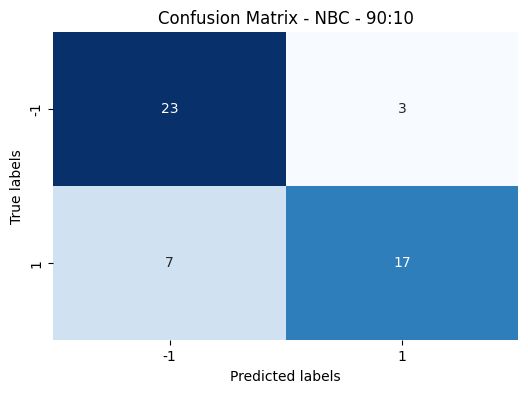

In [ ]:
nb_cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(nb_cm, labels)

## **KLASIFIKASI SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model SVM
svm_model = SVC(kernel='linear')

# Melatih model SVM
svm_model.fit(X_train, y_train)

# Membuat prediksi menggunakan model yang telah dilatih
y_pred = svm_model.predict(X_test)

# Menghitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy*100)


# Tampilkan laporan klasifikasi
print("Laporan Klasifikasi SVM - 90:10 :")
print(classification_report(y_test, y_pred))

Akurasi: 72.0
Laporan Klasifikasi SVM - 90:10 :
              precision    recall  f1-score   support

          -1       0.70      0.81      0.75        26
           1       0.75      0.62      0.68        24

    accuracy                           0.72        50
   macro avg       0.72      0.72      0.72        50
weighted avg       0.72      0.72      0.72        50



In [ ]:
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels, cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix - SVM - 90:10')
    plt.show()

In [ ]:
labels = df['Label'].unique()

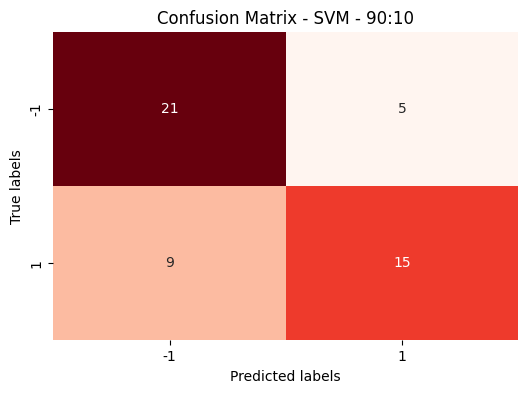

In [ ]:
nb_cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(nb_cm, labels)

***SPLIT VALIDATION DATA***

80:20

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_mat_unigram, df['Label'], test_size=0.2, random_state=42)


## **KLASIFIKASI NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model klasifikasi Naive Bayes
nb_classifier = MultinomialNB()

# Latih model menggunakan data latih
nb_classifier.fit(X_train, y_train)

# Lakukan prediksi menggunakan data uji
y_pred = nb_classifier.predict(X_test)

# Hitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Naive Bayes:", accuracy*100)

# Tampilkan laporan klasifikasi
print("Laporan Klasifikasi Naive Bayes - 80:20 :")
print(classification_report(y_test, y_pred))

Akurasi Naive Bayes: 71.71717171717171
Laporan Klasifikasi Naive Bayes - 80:20 :
              precision    recall  f1-score   support

          -1       0.66      0.85      0.74        47
           1       0.82      0.60      0.69        52

    accuracy                           0.72        99
   macro avg       0.74      0.72      0.71        99
weighted avg       0.74      0.72      0.71        99



In [ ]:
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix - NBC - 80:20')
    plt.show()

In [ ]:
labels = df['Label'].unique()

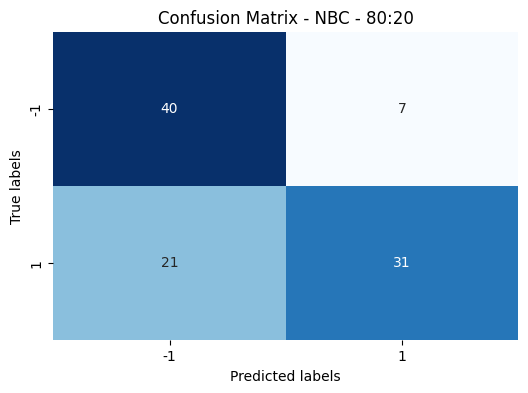

In [ ]:
nb_cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(nb_cm, labels)

## **KLASIFIKASI SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model SVM
svm_model = SVC(kernel='linear')

# Melatih model SVM
svm_model.fit(X_train, y_train)

# Membuat prediksi menggunakan model yang telah dilatih
y_pred = svm_model.predict(X_test)

# Menghitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy*100)


# Tampilkan laporan klasifikasi
print("Laporan Klasifikasi SVM - 80:20 :")
print(classification_report(y_test, y_pred))

Akurasi: 71.71717171717171
Laporan Klasifikasi SVM - 80:20 :
              precision    recall  f1-score   support

          -1       0.66      0.85      0.74        47
           1       0.82      0.60      0.69        52

    accuracy                           0.72        99
   macro avg       0.74      0.72      0.71        99
weighted avg       0.74      0.72      0.71        99



In [ ]:
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels, cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix - SVM - 80:20')
    plt.show()

In [ ]:
labels = df['Label'].unique()

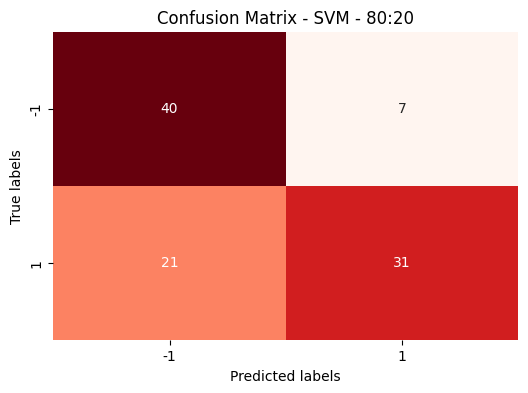

In [ ]:
nb_cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(nb_cm, labels)

***SPLIT VALIDATION DATA***

70 : 30

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_mat_unigram, df['Label'], test_size=0.3, random_state=42)


##**KLASIFIKASI NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model klasifikasi Naive Bayes
nb_classifier = MultinomialNB()

# Latih model menggunakan data latih
nb_classifier.fit(X_train, y_train)

# Lakukan prediksi menggunakan data uji
y_pred = nb_classifier.predict(X_test)

# Hitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Naive Bayes:", accuracy*100)

# Tampilkan laporan klasifikasi
print("Laporan Klasifikasi Naive Bayes - 70:30 :")
print(classification_report(y_test, y_pred))


Akurasi Naive Bayes: 77.7027027027027
Laporan Klasifikasi Naive Bayes - 70:30 :
              precision    recall  f1-score   support

          -1       0.75      0.87      0.80        78
           1       0.82      0.67      0.74        70

    accuracy                           0.78       148
   macro avg       0.79      0.77      0.77       148
weighted avg       0.78      0.78      0.77       148



In [ ]:
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix - NBC - 70:30')
    plt.show()

In [ ]:
labels = df['Label'].unique()

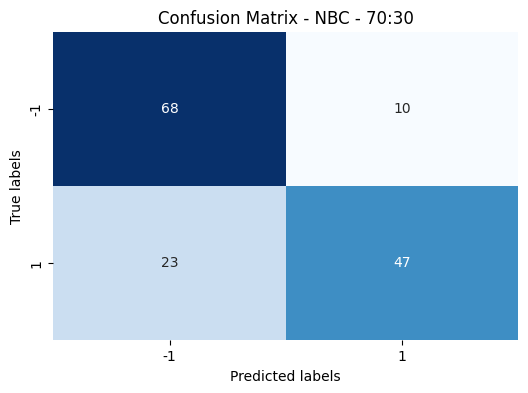

In [ ]:
nb_cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(nb_cm, labels)

## **KLASIFIKASI SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model SVM
svm_model = SVC(kernel='linear')

# Melatih model SVM
svm_model.fit(X_train, y_train)

# Membuat prediksi menggunakan model yang telah dilatih
y_pred = svm_model.predict(X_test)

# Menghitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy*100)


# Tampilkan laporan klasifikasi
print("Laporan Klasifikasi SVM - 70:30 :")
print(classification_report(y_test, y_pred))

Akurasi: 77.02702702702703
Laporan Klasifikasi SVM - 70:30 :
              precision    recall  f1-score   support

          -1       0.75      0.85      0.80        78
           1       0.80      0.69      0.74        70

    accuracy                           0.77       148
   macro avg       0.78      0.77      0.77       148
weighted avg       0.77      0.77      0.77       148



In [ ]:
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels, cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix - SVM - 70:30')
    plt.show()

In [ ]:
labels = df['Label'].unique()

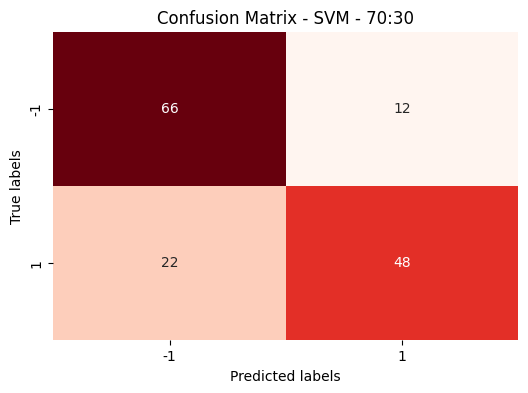

In [ ]:
nb_cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(nb_cm, labels)

**SPLIT VALIDATION DATA**

60 : 40

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_mat_unigram, df['Label'], test_size=0.4, random_state=42)


##**KLASIFIKASI NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model klasifikasi Naive Bayes
nb_classifier = MultinomialNB()

# Latih model menggunakan data latih
nb_classifier.fit(X_train, y_train)

# Lakukan prediksi menggunakan data uji
y_pred = nb_classifier.predict(X_test)

# Hitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Naive Bayes:", accuracy*100)

# Tampilkan laporan klasifikasi
print("Laporan Klasifikasi Naive Bayes - 60:40 :")
print(classification_report(y_test, y_pred))

Akurasi Naive Bayes: 76.6497461928934
Laporan Klasifikasi Naive Bayes - 60:40 :
              precision    recall  f1-score   support

          -1       0.78      0.82      0.80       110
           1       0.75      0.70      0.73        87

    accuracy                           0.77       197
   macro avg       0.76      0.76      0.76       197
weighted avg       0.77      0.77      0.77       197



In [ ]:
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix - NBC - 60:40')
    plt.show()

In [ ]:
labels = df['Label'].unique()

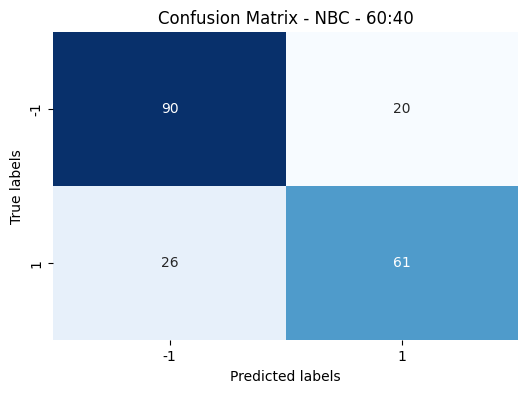

In [ ]:
nb_cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(nb_cm, labels)

## **KLASIFIKASI SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model SVM
svm_model = SVC(kernel='linear')

# Melatih model SVM
svm_model.fit(X_train, y_train)

# Membuat prediksi menggunakan model yang telah dilatih
y_pred = svm_model.predict(X_test)

# Menghitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy*100)


# Tampilkan laporan klasifikasi
print("Laporan Klasifikasi SVM - 60:40 :")
print(classification_report(y_test, y_pred))

Akurasi: 73.60406091370558
Laporan Klasifikasi SVM - 60:40 :
              precision    recall  f1-score   support

          -1       0.76      0.77      0.77       110
           1       0.71      0.69      0.70        87

    accuracy                           0.74       197
   macro avg       0.73      0.73      0.73       197
weighted avg       0.74      0.74      0.74       197



In [ ]:
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels, cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix - SVM - 60:40')
    plt.show()

In [ ]:
labels = df['Label'].unique()

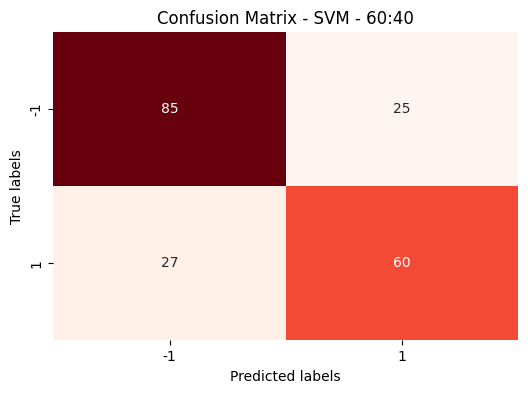

In [ ]:
nb_cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(nb_cm, labels)